## Bitwise Operation Example - Signature

In this usage example, let's assume you need to attach a virtual signature to an image. The goal is to show a simple way to use bitwise operations to automate this task.

##### Library Inporting

In [4]:
import os
from glob import glob
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

##### Image Reading

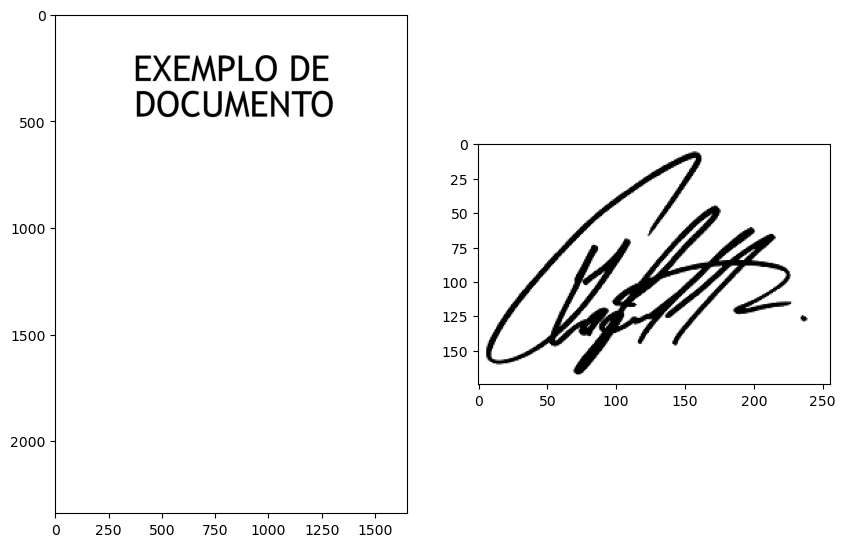

In [10]:
# Getting the document sample image path
path = os.getcwd()
imgDoc = cv.imread(path + './Resources/Img/signature/document_example.png', cv.IMREAD_UNCHANGED)

imgDocCopy = imgDoc.copy()

# Getting the signature
imgSignature = cv.imread(path + './Resources/Img/signature/signature_example.png')

# Image Plotting
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(imgDoc, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgSignature, cmap='gray')
plt.show()

##### Determining the Position of the Signature

In [12]:
rows, columns, channels = imgSignature.shape
print(f"Signature: {rows} pixels high and {columns} pixels width")

# Determining the ROI that the signature will remain
roi = imgDocCopy[100:rows+100, 100:columns+100]

Signature: 175 pixels high and 256 pixels width


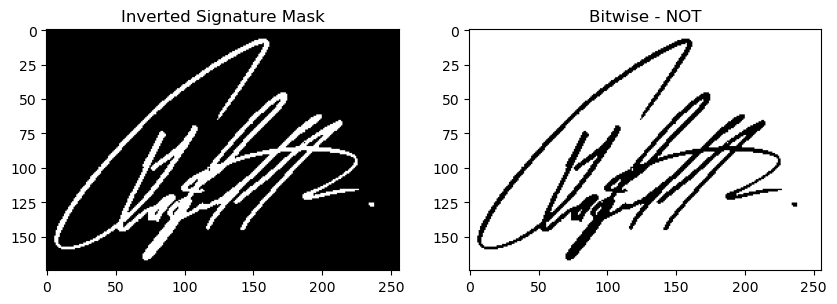

In [13]:
# Processing to signature insertion
imgSignatureGray = cv.cvtColor(imgSignature, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(imgSignatureGray, 0, 255, cv.THRESH_BINARY_INV) # converts to binary inv

# Using Bitwise NOT to Invert the Pixels
maskInv = cv.bitwise_not(mask)

# Signature Plotting
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Inverted Signature Mask")

plt.subplot(1, 2, 2)
plt.imshow(maskInv, cmap='gray')
plt.title("Bitwise - NOT")
plt.show()

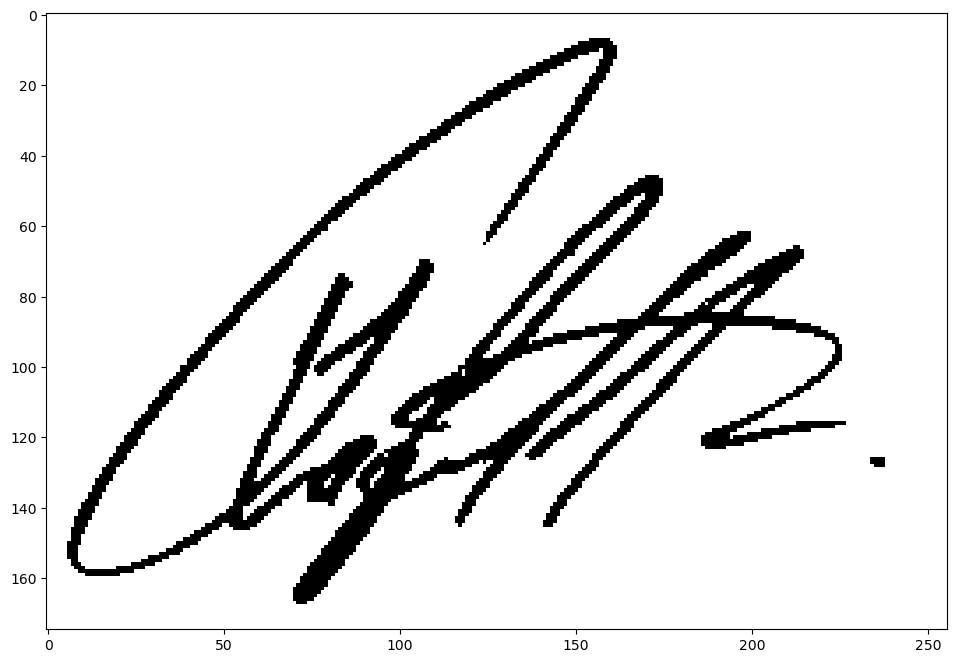

In [19]:
# Bitwise AND to get the common pixels in both images
imgSignature_bg = cv.bitwise_and(roi, roi, mask = maskInv)
plt.figure(figsize=(16,8))
plt.imshow(imgSignature_bg)
plt.show()


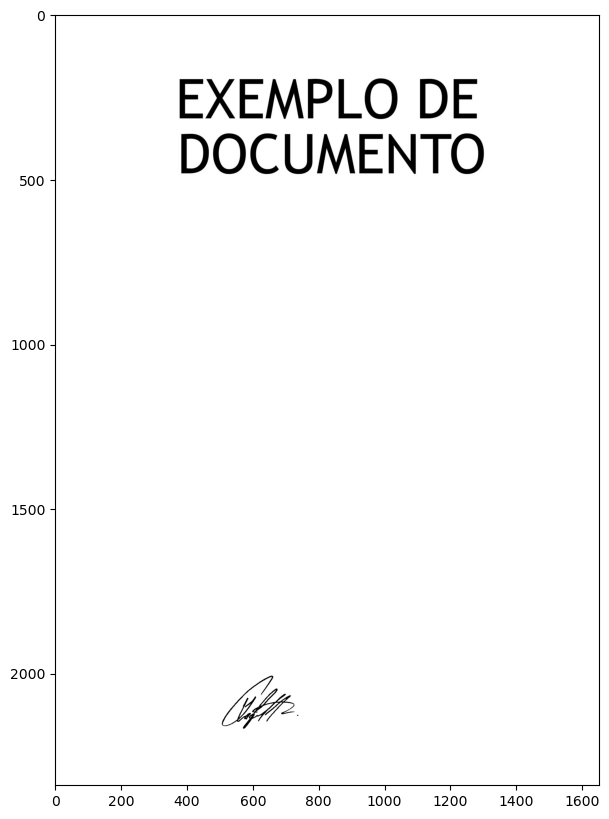

In [22]:
# Just the Signature Region of the Image
imgSignature_fg = cv.bitwise_and(imgSignature, imgSignature, mask = mask)

# Placing the Image in the ROI and Modifying the Main Image
destiny = cv.add(imgSignature_bg, imgSignature_fg)
imgDocCopy[2000:rows+2000, 500:columns+500] = destiny

plt.figure(figsize=(20,10))
plt.imshow(imgDocCopy)
plt.show()